# Домашнее задание 1

Выполнили студенты 25ИАД:
1) Данил Ерёменко
2) Кудасов Максим

Вариант -- 7

In [288]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import BayesianRidge
from sklearn.covariance import MinCovDet
from sklearn.manifold import MDS
from scipy.stats import chi2
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [289]:
# Сделаем более читаемый вывод для numpy переменных
np.set_printoptions(suppress = True, precision = 3)

# Считываем датасет
name_of_cols = [
    "Age",
    "Number of dependents",
    "Income",
    "Duration of stay",
    "Vehicle appraisal",
    "Loan amount",
]

path_to_file = "Materials/25MAG_HW_1_v7.xls"
df = pd.read_excel(path_to_file, header=None, names=name_of_cols)
df

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
0,42.000,4.000,"43,300.000",9.000,"44,000.000","437,000.000"
1,44.000,NaN,"12,100.000",13.000,"12,000.000","123,000.000"
2,47.000,3.000,"28,700.000",14.000,"30,000.000","293,000.000"
3,40.000,1.000,"7,500.000",11.000,"7,000.000","74,000.000"
4,39.000,1.000,"9,400.000",11.000,"9,000.000","93,000.000"
5,NaN,0.000,"4,900.000",7.000,"4,000.000","42,000.000"
6,50.000,3.000,"14,700.000",16.000,NaN,"153,000.000"
7,56.000,4.000,"25,500.000",19.000,"28,000.000","268,000.000"
8,50.000,3.000,"16,800.000",16.000,"18,000.000","175,000.000"
9,39.000,2.000,NaN,9.000,"29,000.000","292,000.000"


## Анализ признаков и их распределений

1) Находим максимальное, минимальное значения, среднее, стандартное отклонение, медиану и квартили
2) Строим гистограммы для каждого из признаков
3) Строим графы корреляций между признаками
4) Делаем выводы о данных

In [290]:
# По каждому признаку найдём основные характеристики
# mean -- среднее
# std -- стандартное отклонение
# 25%, 50%, 75% -- квартили
# 50% -- медиана

df.describe(percentiles=[.25, .50, .75])

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
count,49.000,49.000,49.000,50.000,49.000,50.000
mean,39.265,2.000,"19,332.653",9.840,"21,081.633","199,960.000"
std,8.960,1.000,"9,977.504",4.871,"11,638.365","97,963.542"
min,19.000,0.000,"1,500.000",0.000,0.000,"4,000.000"
25%,34.000,1.000,"12,100.000",6.000,"13,000.000","128,500.000"
50%,40.000,2.000,"16,800.000",10.000,"19,000.000","193,000.000"
75%,46.000,3.000,"28,700.000",14.000,"30,000.000","292,750.000"
max,56.000,4.000,"43,300.000",19.000,"50,000.000","437,000.000"


In [291]:
def draw_plots(table: pd.DataFrame):
    for feature in table.columns:
        values = table[feature].dropna()

        fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
        ax_hist, ax_box = axes

        fig.suptitle(feature, fontsize=14)

        ax_hist.hist(values, bins=20)
        ax_box.boxplot(values, vert=False)

        plt.show()


def draw_corr_plots(table: pd.DataFrame, outliers: pd.DataFrame = None):
    for (x, y) in combinations(table.columns, 2):
        if x == y:
            continue

        corrs = table[[x, y]].dropna()
        corr_coeff = corrs.corr(method="pearson").iloc[0, 1]
        
        if abs(corr_coeff) < 0.5:
            continue

        plt.scatter(corrs[x], corrs[y])
        plt.xlabel(x)
        plt.ylabel(y)

        if outliers is not None:
            outlier_points = outliers[[x, y]].dropna()
            plt.scatter(outlier_points[x], outlier_points[y],
                        color='red', label='Выбросы', zorder=5)
            for idx, row in outlier_points.iterrows():
                    plt.text(row[x], row[y], str(idx),
                             fontsize=8, color='darkred', ha='right', va='bottom')
            

        plt.show()

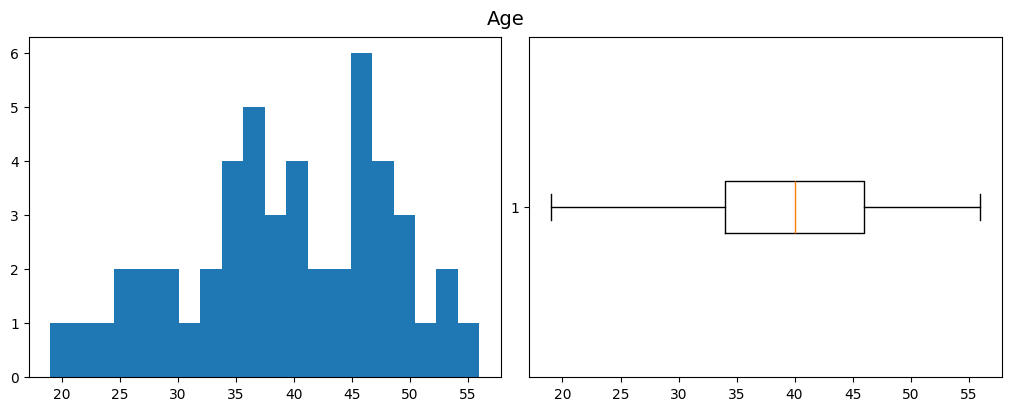

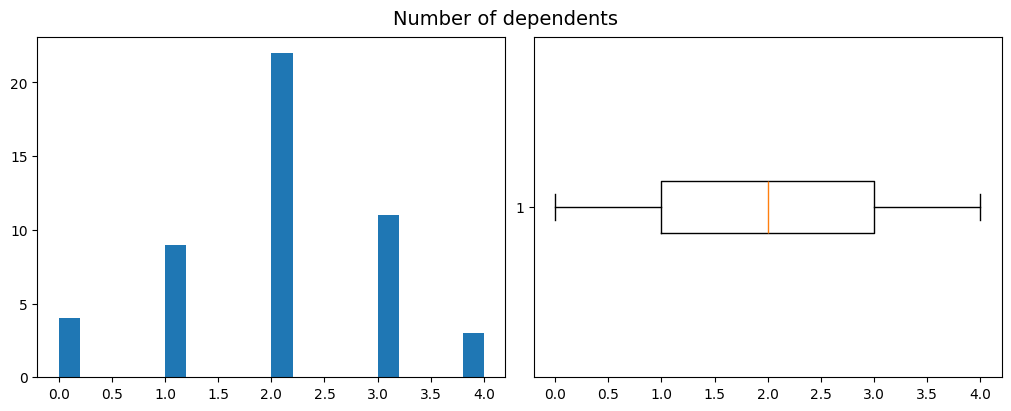

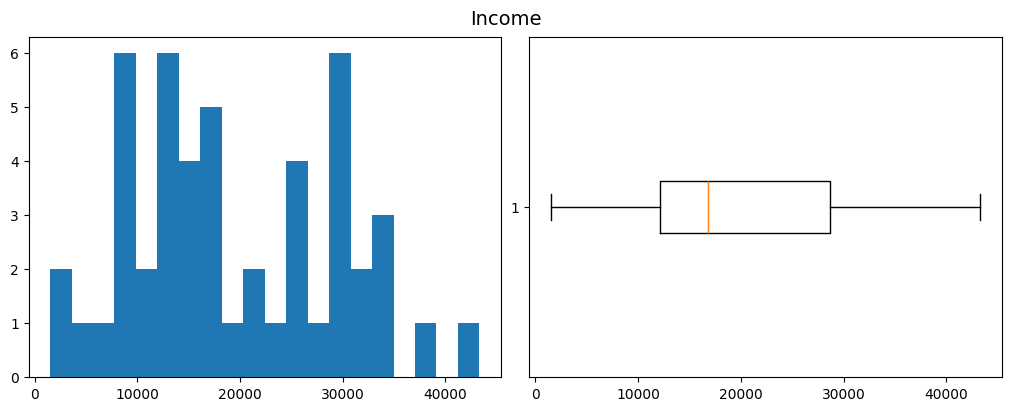

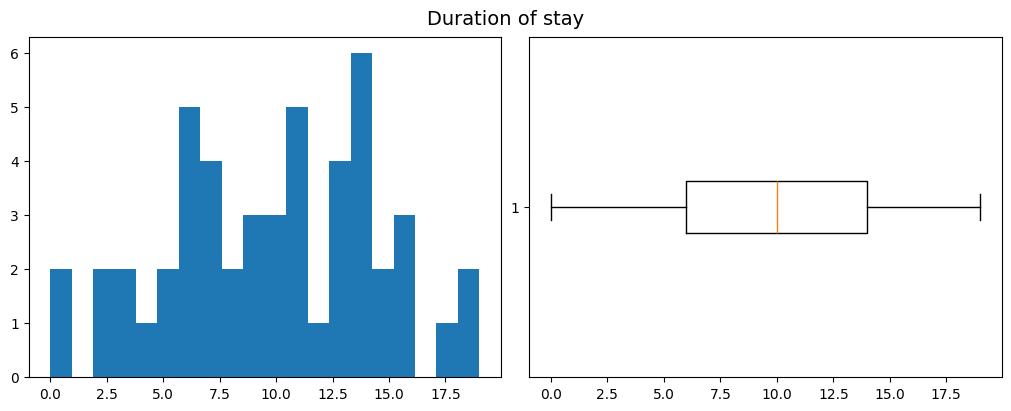

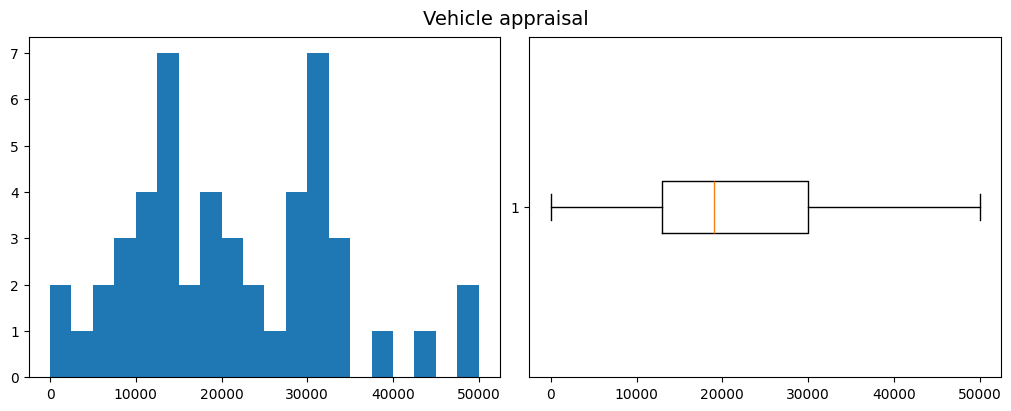

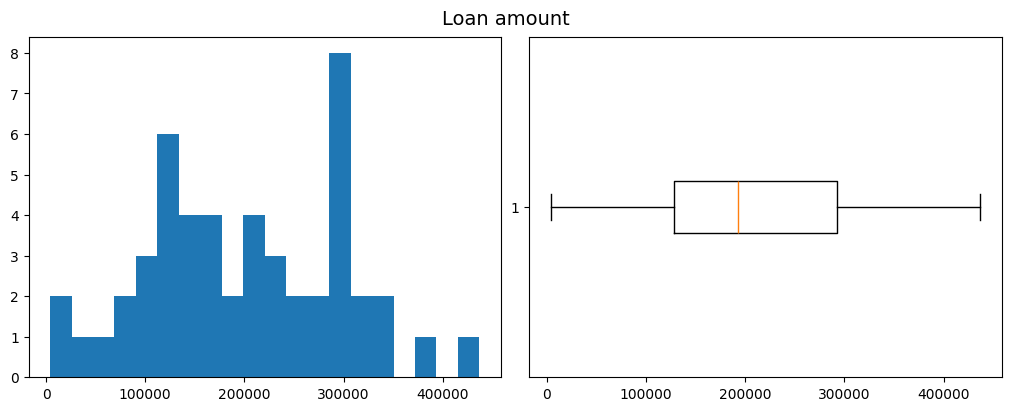

In [292]:
# Строим графики признаков
draw_plots(df)

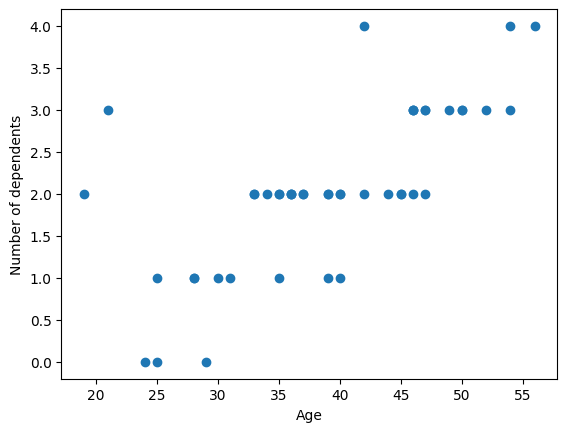

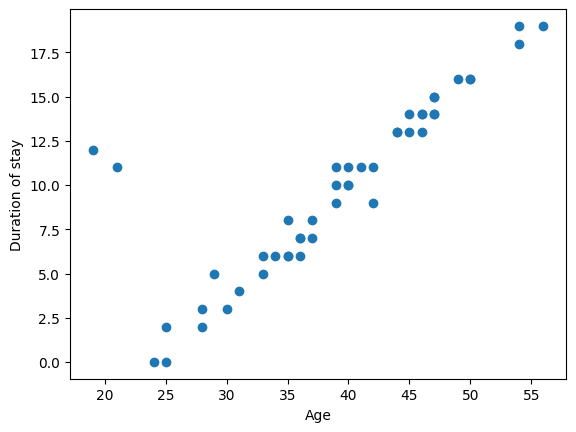

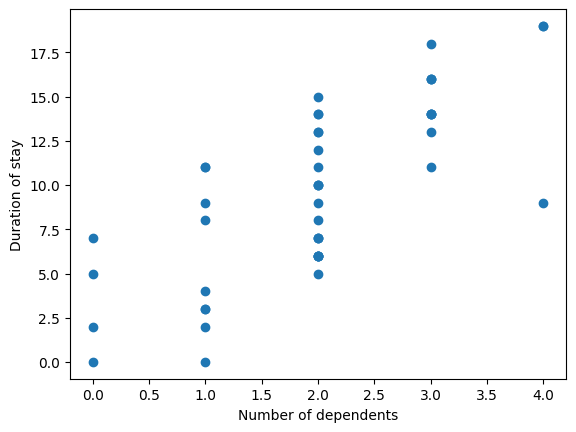

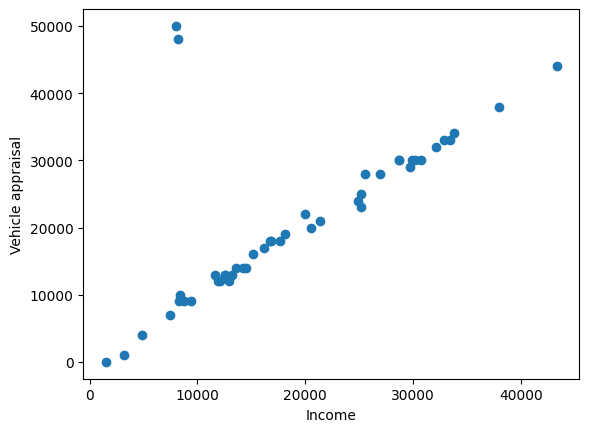

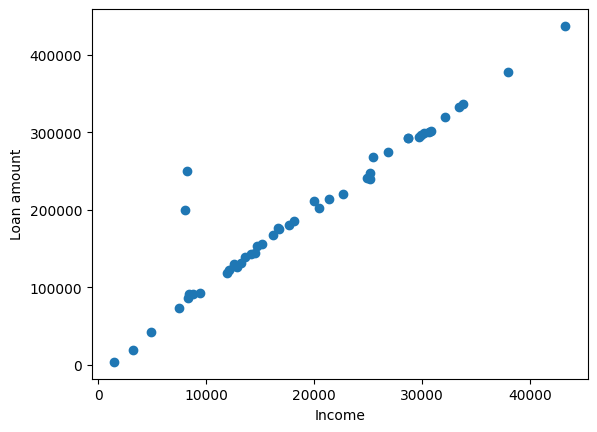

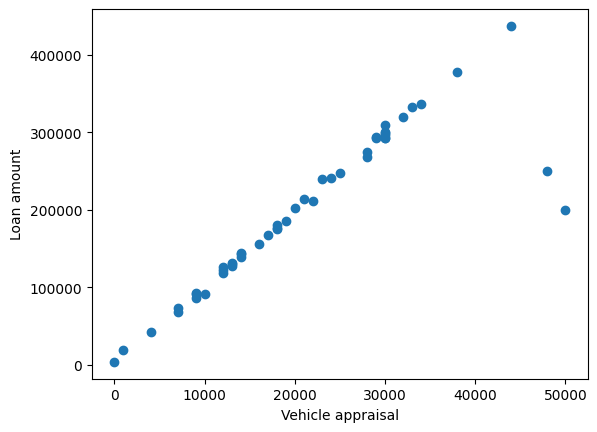

In [293]:
# Строим корреляции признаков между собой (для высоких значений корреляции, по модулю превышающие 50%)
draw_corr_plots(df)

Анализируя графики зависимостей, видно, что некоторые признаки между собой линейно коррелируют.
Среди них:
1) Зависимость числа иждивенцев от возраста. Есть три группы: 1 и меньше иждивенцев статистически имеют люди в возрасте от 25 до 40; 2 иждивенцами обладают люди в возрасте примерно от 32 до 47 (заметно выраженно); 3-4 иждивенцами обладают в преобладающем числе люди в возрасте от 45 до 55.
2) Зависимость возраста от срока пребывания в регионе. Практически линейная зависимость: чем старше человек, тем он дольше находится в регионе.
3) Число иждивенцев от срока проживания также линейно зависит, но сроки достаточно широкие, поэтому тут скорее проще сказать, что статистически число иждивенцев растёт со сроком пребывания, но очень неохотно.
4) Зависимость оценки автомобиля от его дохода тоже линейна: чем больше доход, тем дороже автомобиль.
5) Далее также видно: чем выше доход, тем выше и выбранный кредит, при том зависимость линейная
6) Закономерно, линейная зависимость есть и у оценки автомобиля от размера кредита

Отсюда можно сделать вывод, что тут почти все факторы между собой очень сильно коррелируют, при том их можно отнести в две группы:
1) Группа "Возраст, время проживания, число иждивенцев"
2) Группа "Доход, кредит, автомобиль"

И между собой группы коррелируют незначительно (коэфф. корреляции ниже 0.5), поэтому можно уже предположить, что скрытых фактора будет не менее 2-х, но скорее всего либо 2, либо 3, т.к. корреляция на 0.3 между группами есть, но в ней достаточно мало полезных данных для анализа.

Также заметны выбросы поодаль от линии корреляции признаков.

## Предобработка данных

Существует несколько подходов к обработке пропущенных значений в данных. Среди наиболее распространённых: 
1) Заполнение глобальным средним или медианой — замена пропусков средним (для числовых признаков) или модой/медианой (в зависимости от распределения).
2) Заполнение средним/медианой внутри групп — например, разделение данных на подгруппы по другому признаку (скажем, по уровню дохода или категории) и заполнение пропусков статистикой, вычисленной только внутри соответствующей группы.
3) Регрессионное восстановление — обучение регрессионной модели на объектах без пропусков и использование этой модели для предсказания недостающих значений.
     

Однако простая замена пропусков константным значением (например, общим средним или медианой) может привести к существенному искажению статистических свойств данных: занижается дисперсия, ослабляются или искажаются корреляции между признаками, а распределение признака становится менее естественным — даже в случае, когда пропуски полностью случайны (MCAR)

Поэтому, если между признаками есть выраженная зависимость, предпочтительнее использовать модельное восстановление пропусков, например, с помощью регрессии. В частности, можно применить регрессионную модель из библиотеки scikit-learn, что мы и сделаем далее.

Источники:
- loginom.ru/blog/missing

In [294]:
# Считаем число пропусков в каждом признаке
df.isna().sum()

Age                     3
Number of dependents    3
Income                  3
Duration of stay        2
Vehicle appraisal       3
Loan amount             2
dtype: int64

In [295]:
# Заполняем пропуски с помощью стохастической регрессии
imputer = IterativeImputer(BayesianRidge(), max_iter=20, random_state=0)
df_new = pd.DataFrame(imputer.fit_transform(df), columns=df.columns).map(lambda x: int(x))
df_new

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
0,42,4,43300,9,44000,437000
1,44,2,12100,13,12000,123000
2,47,3,28700,14,30000,293000
3,40,1,7500,11,7000,74000
4,39,1,9400,11,9000,93000
5,32,0,4900,7,4000,42000
6,50,3,14700,16,16398,153000
7,56,4,25500,19,28000,268000
8,50,3,16800,16,18000,175000
9,39,2,29240,9,29000,292000


Далее следует заняться выбросами.

Есть несколько вариантов обработать выбросы, например:
1) Метод межквартильного размаха (IQR) -- самый примитивный способ обрезки выбросов внутри признака, однако он учитывает только одномерное распределение признака и игнорирует все зависимости между другими признаками объектов.
2) Z-score (стандартизация) -- метод оценки отклонения наблюдений от среднего в единицах стандартных отклонений. Чувствителен к выбросам, т.к. среднее и дисперсия считаются по всем данным.
3) Расстояние Махаланобиса — многомерное обобщение Z-score, учитывающее ковариационную структуру данных. Оно «сжимает» пространство вдоль направлений с высокой дисперсией и «растягивает» — вдоль направлений с низкой, что позволяет корректно учитывать корреляции между признаками.
4) Изолированный лес -- ансамблевый метод, основанный на случайном разбиении пространства признаков. Эффективен в многомерных задачах и не предполагает конкретного распределения данных.
5) DBSCAN -- алгоритм кластеризации на основе плотности, который автоматически помечает редкие или изолированные точки как выбросы. Также подходит для многомерных данных и сложных геометрий распределений.

Предварительный анализ показал наличие выраженных корреляций внутри двух групп признаков. В таких условиях одномерные методы (например, IQR или Z-score) могут давать ложные срабатывания, поскольку не учитывают взаимосвязи между переменными. Поэтому для детекции выбросов целесообразно использовать расстояние Махаланобиса, которое позволяет корректно оценивать аномальность наблюдений в сильно коррелированной системе. 

Однако классическое расстояние Махаланобиса вычисляется на основе выборочного среднего и ковариационной матрицы, которые сами по себе чувствительны к выбросам. Чтобы избежать этого, можно использовать робастные оценки центра и ковариации. В частности, подходит метод Minimum Covariance Determinant (MinCovDet), реализованный, например, в библиотеке scikit-learn. Он находит подмножество наблюдений фиксированного размера с минимальным определителем ковариационной матрицы и строит на нём устойчивые оценки среднего и ковариации. Это позволяет надёжно выявлять выбросы даже в присутствии значительного их количества.

Источники:
- https://loginom.ru/blog/outliers
- https://scikit-learn.org/stable/modules/outlier_detection.html
- https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html

In [296]:
def mahal_outliers_mask(table: pd.DataFrame, cols, alpha=0.99):
    X = table[cols]
    mcd = MinCovDet(random_state=42).fit(X)
    dist2 = mcd.mahalanobis(X) # квадрат расстояния
    thr = chi2.ppf(alpha, len(cols)) # хи2 ограничение
    mask = pd.Series(True, index=df.index)
    mask.loc[X.index] = dist2 <= thr # False -- выброс
    return mask

In [297]:
df_new.shape

(52, 6)

In [298]:
mahal_outliers = df_new[-mahal_outliers_mask(df_new, df_new.columns)].copy()

In [299]:
df_mahal = df_new[mahal_outliers_mask(df_new, df_new.columns)].copy()
df_mahal.shape

(42, 6)

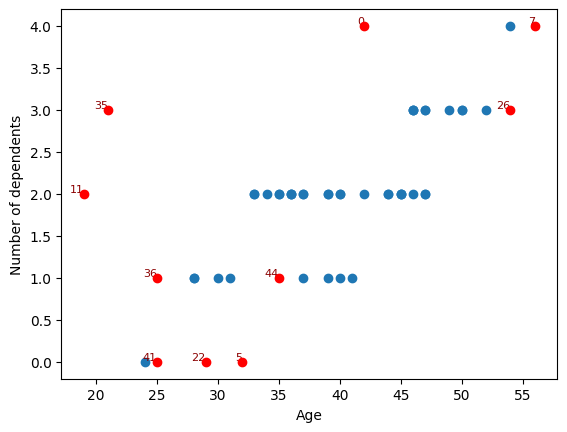

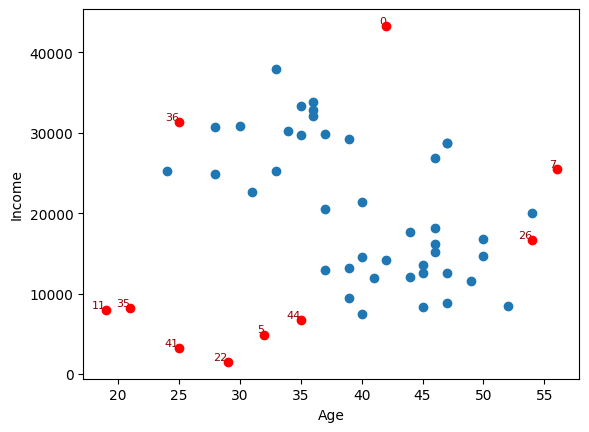

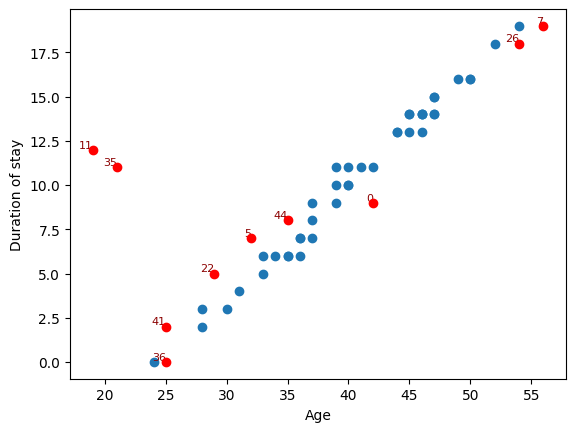

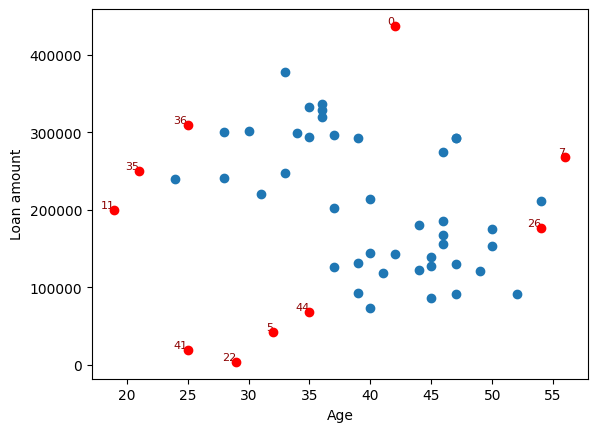

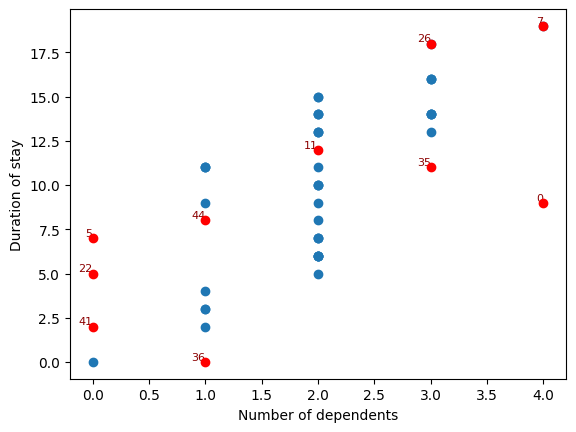

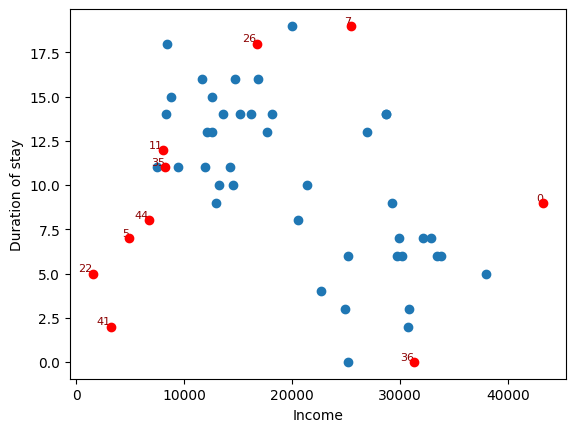

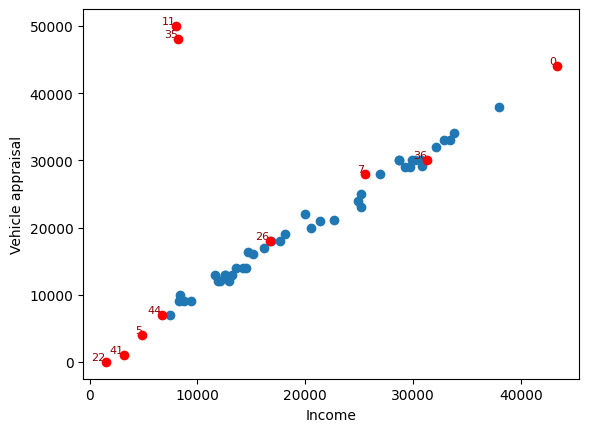

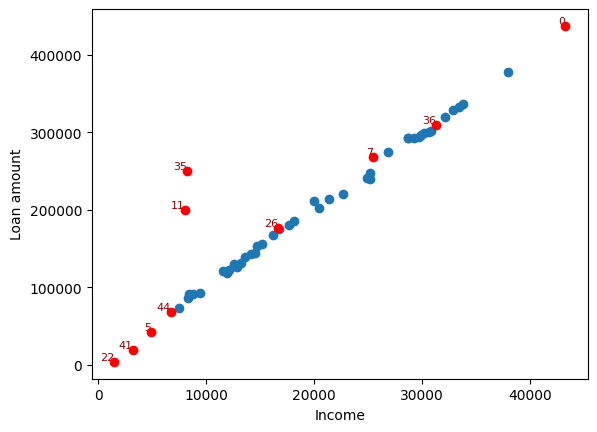

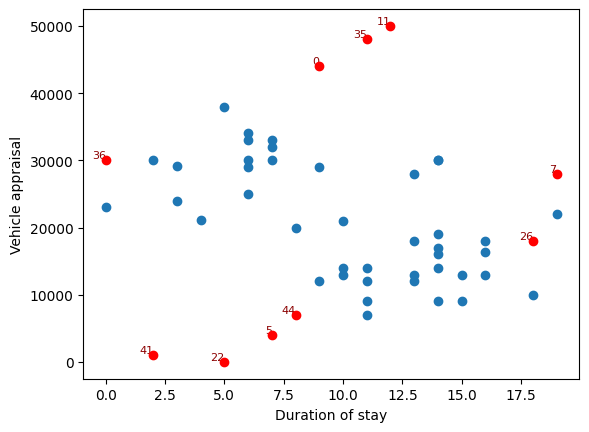

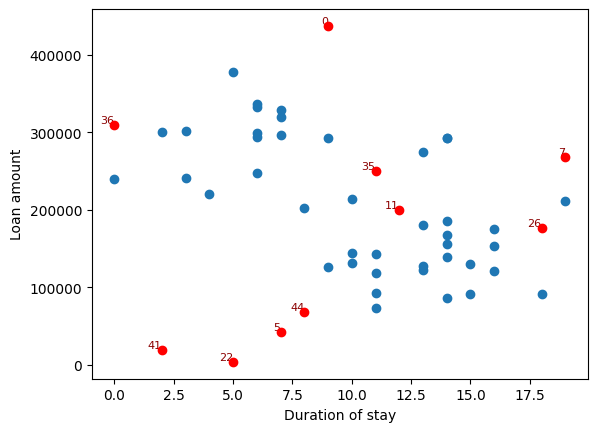

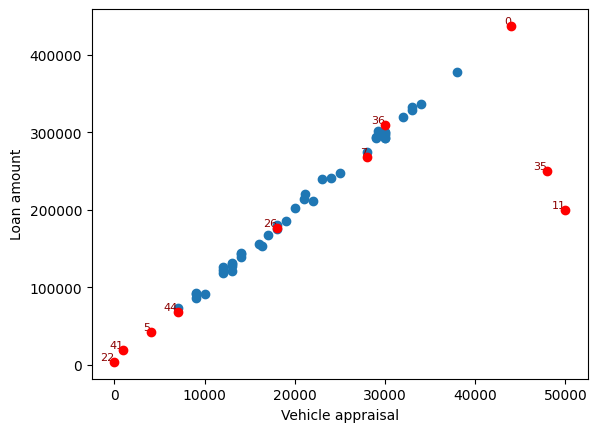

In [300]:
draw_corr_plots(df_mahal, outliers=mahal_outliers)

Махаланобис дает большое число выбросов, некоторые из которых, судя по графикам, не следует таковыми считать; вероятно, это вызвано тем, что метод предназначен для работы с массивами данных, в которых размер выборки значительно превышает число признаков.

Для дополнительного анализа выбросов применим изолированный лес; на основании сочетания результатов обоих подходов мы сможем подобрать более качественный набор выбросов.

In [301]:
# Строим изолированный лес и находим выбросы
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
outliers_if = df_new[clf.fit_predict(df_new) == -1]  # True — выброс
outliers_if

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
0,42,4,43300,9,44000,437000
7,56,4,25500,19,28000,268000
11,19,2,8000,12,50000,200000
22,29,0,1500,5,0,4000
35,21,3,8200,11,48000,250000
41,25,0,3200,2,1000,19000


In [302]:
# Смотрим полученную таблицу без выбросов
df_if = df_new[clf.fit_predict(df_new) == 1]
df_if.shape

(46, 6)

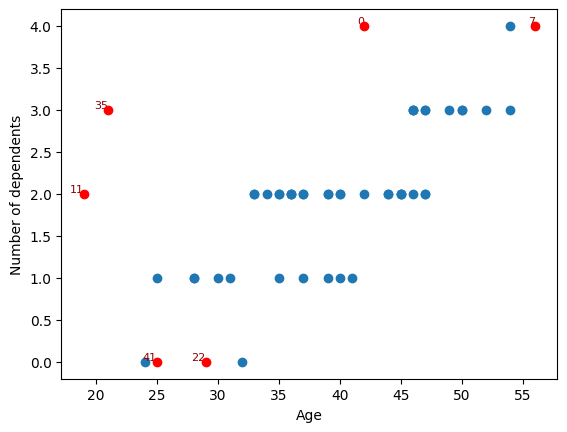

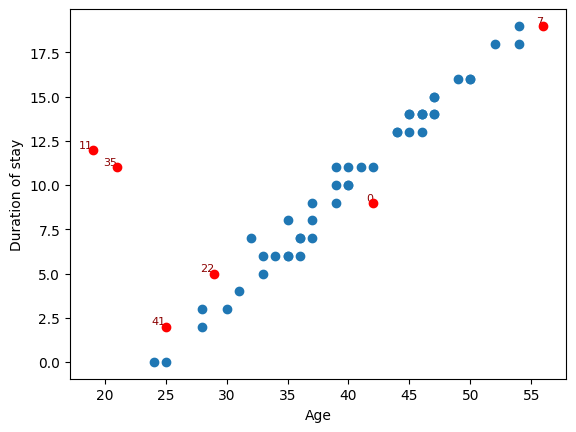

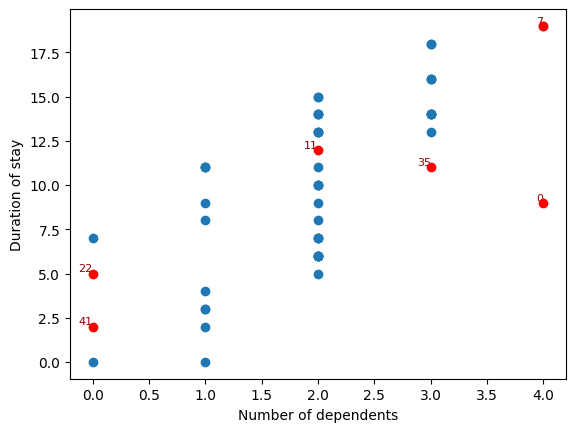

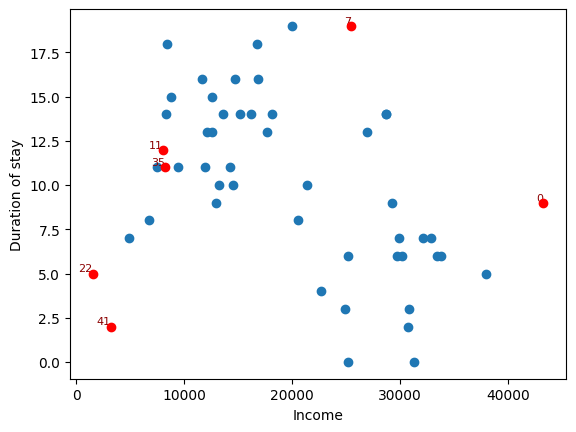

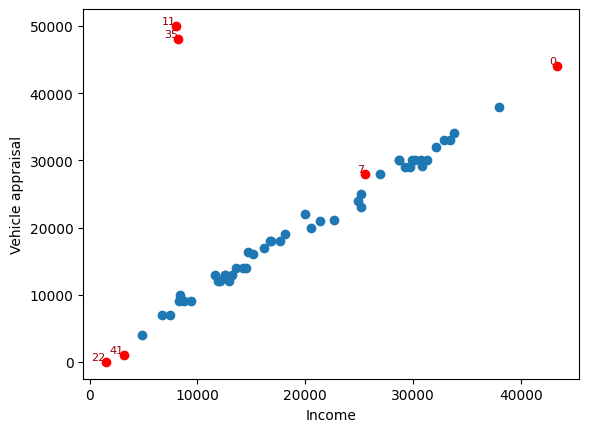

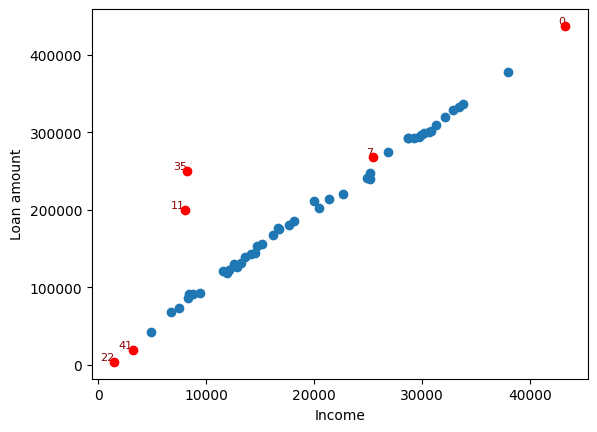

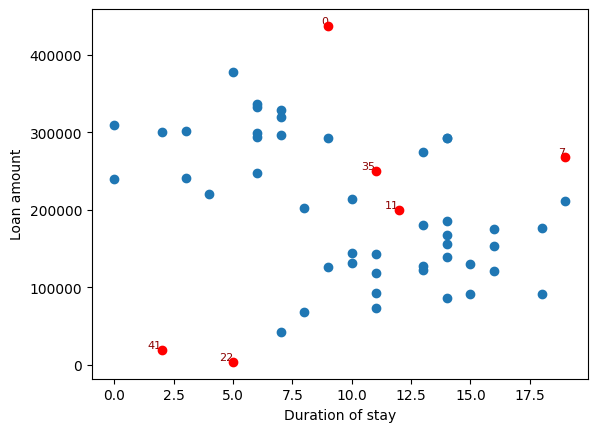

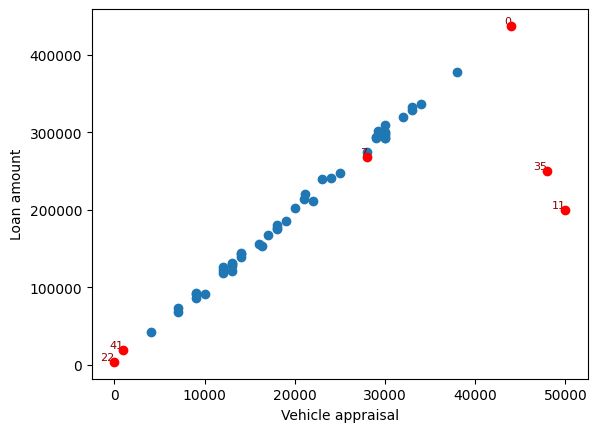

In [303]:
draw_corr_plots(df_if, outliers=outliers_if)

На основании использования двух подходов и исследования графиков можно сделать следующие выводы:

Клиенты 11 и 35 однозначно являются выбросами, что видно на ряде графиков.
Клиенты 0, 7, 22 и 41 относятся к мало представленным группам по числу иждивенцев и сроку проживания, в связи с чем отнесение их к выбросам неоднозначно, особенно в связи с тем, что в этом случае мы будем удалять более половины объектов из категорий с 0 и 4 иждивенцами; тем не менее, в связи с тем, что в обоих подходах эти клиенты оказались выбросами, будем считать их таковыми.

0 -- При своём сроке проживания в 9 лет и возасте 42 года, почему-то он имеет зарплату 43 тысячи, хотя, как видно далее на графиках, у него должна быть зарплата/стоимость автомобиля быть в районе 20 тысяч. На графике "Duration of Stay / Income" как раз видно справа точку, обозначающую этого клиента

7 -- Длительность проживания в регионе и зарплата выбиваются из общего тренда в данных.

11, 35 -- Выбросы по большинству графиков.

22, 41 -- Выбросы в связи с низкой зарплатой для клиентов без иждивенцев.


## Снижение размерности PCA

In [304]:
X_data = df_if.to_numpy()

In [305]:
# Центрируем и нормализуем (через L2-норму)
X_centered = X_data - X_data.mean(axis=0)
X_cleaned = X_centered / np.linalg.norm(X_centered, axis=0)
X_cleaned

array([[ 0.07634169,  0.00769641, -0.13145743,  0.08783946, -0.13704713,
        -0.13114224],
       [ 0.13552794,  0.18471378,  0.14113155,  0.11845018,  0.16414735,
         0.15275943],
       [-0.00257332, -0.16932096, -0.20699413,  0.02661802, -0.22071226,
        -0.21297272],
       [-0.02230207, -0.16932096, -0.17579419,  0.02661802, -0.1872462 ,
        -0.18124254],
       [-0.16040332, -0.34633834, -0.24968879, -0.09582486, -0.27091134,
        -0.26641304],
       [ 0.19471419,  0.18471378, -0.08876277,  0.17967162, -0.06345527,
        -0.08104195],
       [ 0.19471419,  0.18471378, -0.05427862,  0.17967162, -0.03664897,
        -0.04430173],
       [-0.02230207,  0.00769641,  0.1499989 , -0.03460342,  0.14741433,
         0.15108942],
       [-0.10121707,  0.00769641,  0.15755257, -0.12643559,  0.14741433,
         0.15442944],
       [-0.31823332, -0.34633834,  0.08365797, -0.31009991,  0.04701617,
         0.06424891],
       [-0.08148832,  0.00769641,  0.19696303, -0.

In [306]:
# Проверяем корректность центрировки и нормировки
assert(np.allclose(X_cleaned, X_cleaned - X_cleaned.mean(axis=0))) # центр должен быть в нуле
assert(np.allclose(np.linalg.norm(X_cleaned, axis=0), np.array([1] * X_cleaned.shape[1]))) # l2 норма должна быть равна 1

## SVD разложение

Далее проведём разложение полученных данных для того, чтобы проанализировать данные на наличие скрытых признаков, на выявление главных признаков и зависимости между скрытыми признаками и изначальными

In [307]:
# Раскладываем
U, S, Vt = np.linalg.svd(X_cleaned, full_matrices=False)
S_r = np.diag(S)

In [308]:
print(f"U shape = {U.shape}")
print(f"S shape = {S.shape}")
print(f"Vt shape = {Vt.shape}")

U shape = (46, 6)
S shape = (6,)
Vt shape = (6, 6)


In [309]:
# Проверяем корректность разложения
assert(np.allclose(X_cleaned, U @ S_r @ Vt))

In [310]:
# Смотрим сингулярные числа
np.set_printoptions(suppress = True, precision = 3)
print(f"Сингулярные числа:\n{S}")
print(f"Квадраты сингулярных чисел:\n{S**2}")
print(f"Вклад факторов в вариацию данных (в %):")
contrib = S**2 / np.sum(S**2) * 100
print(contrib)

Сингулярные числа:
[1.964 1.438 0.267 0.057 0.028 0.009]
Квадраты сингулярных чисел:
[3.856 2.069 0.071 0.003 0.001 0.   ]
Вклад факторов в вариацию данных (в %):
[64.26  34.485  1.186  0.053  0.013  0.001]


In [311]:
# Ищем первые k самых важных факторов
k = 2
sum_contrib = np.sum(contrib[:k])

X_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :] # считаем Zk, просто буквы другие
R = X_cleaned - X_k # Z - Zk

# Считаем абсолютные ошибки
frobenius_error = np.sqrt(np.sum(R**2))
matrix_error = np.sqrt(np.linalg.svd(R, compute_uv=False)[0]**2)

# СЧитаем относительные ошибки
rel_frobenius_error = frobenius_error / np.sqrt(np.sum(X_cleaned**2))
rel_matrix_error = matrix_error / np.sqrt(np.linalg.svd(X_cleaned, compute_uv=False)[0]**2)

print(f"Суммарный вклад первых {k} факторов: {sum_contrib:.2f}")
print(f"Абсолютная ошибка аппроксимации (в норме Фробениуса): {frobenius_error:.2f}")
print(f"Абсолютная ошибка аппроксимации (в матричной форме): {matrix_error:.2f}")
print(f"Относительная ошибка аппроксимации (в норме Фробениуса): {rel_frobenius_error:.2f}")
print(f"Относительная ошибка аппроксимации (в матричной форме): {rel_matrix_error:.2f}")

Суммарный вклад первых 2 факторов: 98.75
Абсолютная ошибка аппроксимации (в норме Фробениуса): 0.27
Абсолютная ошибка аппроксимации (в матричной форме): 0.27
Относительная ошибка аппроксимации (в норме Фробениуса): 0.11
Относительная ошибка аппроксимации (в матричной форме): 0.14


## Анализ признаков

In [312]:
U2, S2, Vt2 = U[:, :k], S[:k], Vt[:k, :]
print(U2.shape)
print(S2.shape)
print(Vt2.shape)

(46, 2)
(2,)
(2, 6)


In [313]:
# Находим коэффициенты корреляции между скрытыми признаками и изначальными
feat_coeffs = Vt2.T * S2
feat_coeffs

array([[-0.79448051,  0.59475427],
       [-0.35295195,  0.91397184],
       [ 0.90783176,  0.41698059],
       [-0.86245735,  0.49266032],
       [ 0.86456035,  0.50014115],
       [ 0.88565978,  0.46186686]])

Тут мы наблюдаем следующее:
1) Существует 2 скрытых фактора, которые суммарно имеют вклад 98.75% в данные, при том значения ошибок очень малы (как абсолютных, так и относительных).
2) Наше предположение о двух независимых группах не беспочвенно, тут действительно достаточно много признаков, которые очень сильно зависят от одного признака и слабее от другого, а конкретнее все признаки, кроме второго ("число иждивенцев"), сильно коррелируют с первым признаком (0.8-0.9), а со вторым слабее (0.4-0.5). Это объясняет сильную корреляцию между почти всеми признаками.
3) Можем обозначить первый признак как "Платежеспособность", а второй как "Семейное положение", но при том достаточно условно, так как все признаки между собой слишком сильно коррелируют, чтобы попытаться разделить их на две группы.

In [314]:
# PCA карта клиектов
clients_coords = pd.DataFrame(X_k @ Vt2.T, index=df_if.index, columns=["Solvency", "Family indicator"])
clients_coords

,Solvency,Family indicator
1,-0.251,-0.061
2,0.066,0.361
3,-0.269,-0.305
4,-0.218,-0.282
5,-0.186,-0.571
6,-0.296,0.186
8,-0.252,0.217
9,0.225,0.127
10,0.303,0.066
12,0.416,-0.397


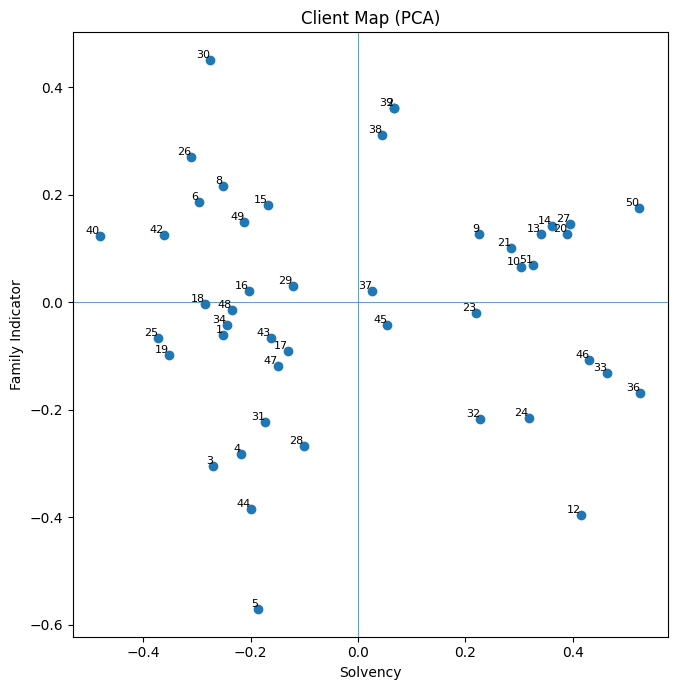

In [315]:
plt.figure(figsize=(7,7))
plt.scatter(clients_coords["Solvency"], clients_coords["Family indicator"])
for i, (x, y) in enumerate(clients_coords.values):
    plt.text(x, y, str(clients_coords.index[i]), fontsize=8, ha="right", va="bottom")

plt.title(f"Client Map (PCA)")
plt.xlabel("Solvency")
plt.ylabel("Family Indicator")
plt.tight_layout()

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.gca().set_aspect('equal','box')

plt.show()

In [316]:
# Выберем нескольких клиентов: в центре и по одному в центрах своих четвертей на карте клиентов
df_new.loc[[37, 24, 3, 26, 50]]

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
37,40,2,21400,10,21000,214000
24,28,1,24900,3,24000,241000
3,40,1,7500,11,7000,74000
26,54,3,16700,18,18000,177000
50,33,2,38000,5,38000,377000


In [317]:
# Проверим соотношение с глобальным средним человеком
df_new.describe().loc['mean']

Age                         39.192
Number of dependents         1.981
Income                  19,510.577
Duration of stay            10.077
Vehicle appraisal       21,149.038
Loan amount            200,928.462
Name: mean, dtype: float64

In [318]:
# Смотрим статистику по числу платёжеспособных клиентов
clients_coords[clients_coords["Solvency"] > 0].shape[0] / clients_coords.shape[0]

0.45652173913043476

In [319]:
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
clients_coords.describe()

,Solvency,Family indicator
count,46.000,46.000
mean,-0.000,-0.000
std,0.293,0.214
min,-0.480,-0.571
25%,-0.242,-0.116
50%,-0.126,0.008
75%,0.298,0.139
max,0.526,0.451


- В данной выборке более платежеспособные клиенты банка имеют тенденцию быть моложе, нежели менее платежеспособные.
- Кроме того, клиенты с меньшим числом иждивенцев моложе и более платежеспособны, а клиенты с большим числом иждивенцев старше и менее платежеспособны.

Если рассмотреть значения признаков отдельных клиентов на данной карте, можно увидеть, что по сочетанию признаков числа иждивенцев и возраста можно выделить несколько кластеров.

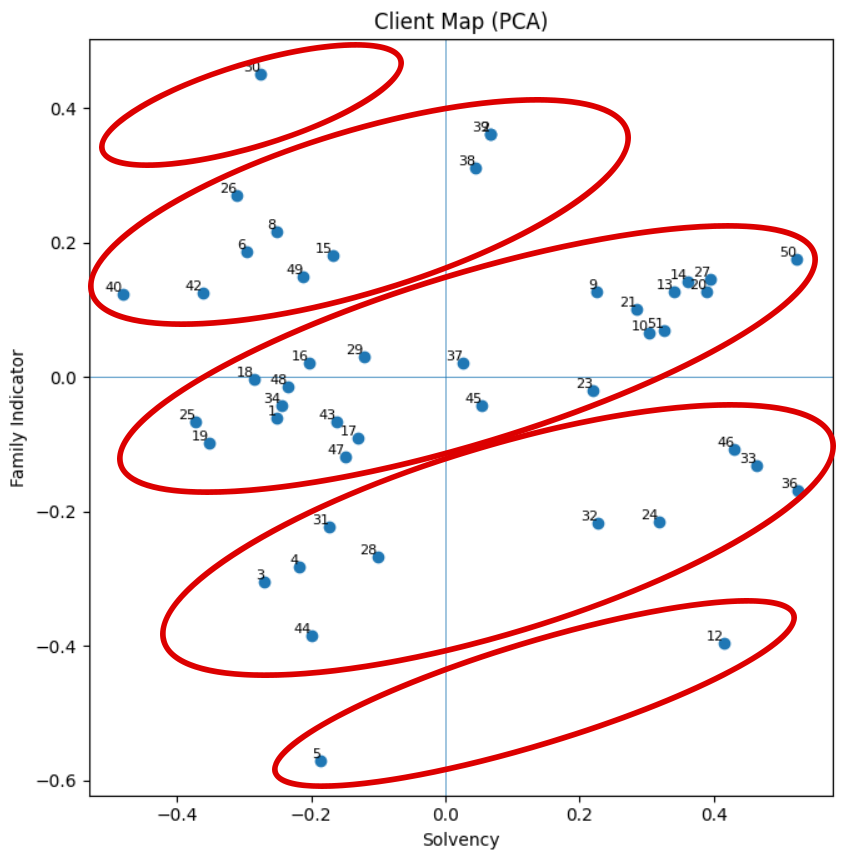

## Общие выводы по клиентам банка

1) В нашей выборке у более молодых клиентов меньше иждивенцев, меньше срок проживания в регионе, выше зарплата, стоимость автомобиля и сумма кредита
2) Зависимость зарплаты, стоимости автомобиля и размера кредита близка к линейной (1:1:10); зависимость возраста, времени проживания и число иждивенцев также близка к линейной.

## MDS

In [320]:
# Считаем матрицу расстояний. За метрику возьмём расстояние Чебышева
D_cheb = squareform(pdist(X_k @ Vt2.T, metric='chebyshev'))
D_cheb

array([[0.        , 0.42233061, 0.24333333, ..., 0.21147364, 0.77488264,
        0.57654347],
       [0.42233061, 0.        , 0.66566394, ..., 0.27760543, 0.45739799,
        0.29203356],
       [0.24333333, 0.66566394, 0.        , ..., 0.45480696, 0.79291414,
        0.59457498],
       ...,
       [0.21147364, 0.27760543, 0.45480696, ..., 0.        , 0.73500342,
        0.53666425],
       [0.77488264, 0.45739799, 0.79291414, ..., 0.73500342, 0.        ,
        0.19833917],
       [0.57654347, 0.29203356, 0.59457498, ..., 0.53666425, 0.19833917,
        0.        ]], shape=(46, 46))

In [321]:
# Используем метрический MDS с расстояниями Чебышёва
mds = MDS(
    n_components=2,
    dissimilarity='precomputed', # расстояния уже посчитаны
    random_state=42,
    max_iter=1000,
    eps=1e-9
)

# Получаем новое представление клиентов
X_mds = mds.fit_transform(D_cheb)
X_mds

/home/dantimson/ADKalyagin/Kalyagin-Lab1/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


array([[-0.21096803,  0.14955759],
       [ 0.25965576,  0.1586161 ],
       [-0.35826602, -0.03640223],
       [-0.31245281, -0.04314088],
       [-0.42715604, -0.32607027],
       [-0.06923165,  0.32701545],
       [-0.01320255,  0.31252287],
       [ 0.20221613, -0.08642816],
       [ 0.23208896, -0.16773548],
       [-0.01467147, -0.48706035],
       [ 0.29007916, -0.15441929],
       [ 0.31117061, -0.16112189],
       [ 0.01578403,  0.22884071],
       [-0.12382901,  0.17131312],
       [-0.15000251,  0.05007237],
       [-0.19312188,  0.20807781],
       [-0.29572348,  0.18701646],
       [ 0.32409916, -0.18842465],
       [ 0.23378278, -0.13638475],
       [ 0.13091237, -0.16045818],
       [ 0.06276351, -0.33625477],
       [-0.28898987,  0.22312125],
       [-0.01091107,  0.37867416],
       [ 0.33708659, -0.18282333],
       [-0.22103835, -0.09107399],
       [-0.06307847,  0.12215626],
       [ 0.19233377,  0.42788622],
       [-0.25321473, -0.01775936],
       [-0.00050736,

In [322]:
# Оценка погрешности (stress)
stress = mds.stress_
print(f"Stress (погрешность MDS): {stress:.4f}")

# Нормированный стресс
total_sq = (D_cheb ** 2).sum() / 2 
normalized_stress = stress / total_sq
print(f"Normalized stress: {normalized_stress:.4f}")

Stress (погрешность MDS): 1.3770
Normalized stress: 0.0060


In [323]:
D_euclid_2d = squareform(pdist(X_mds, metric='euclidean'))

corr = np.corrcoef(D_cheb.flatten(), D_euclid_2d.flatten())[0,1]
print(f"Корреляция между расстояниями Чебышева и евклидовыми расстояниями в 2D: {corr:.4f}")


Корреляция между расстояниями Чебышева и евклидовыми расстояниями в 2D: 0.9865


Из низкого значения нормированного стресса и высокой корреляции расстояний можно сделать вывод, что клиентов банка действительно можно перенести в евклидово пространство размерности 2 с незначительной погрешностью. Однако, для того, чтобы этот перенос был возможен с точным сохранением расстояний, все сингулярные значения после второго должны быть равны нулю, что в нашем случае не выполняется; значит, поместить клиентов банка с сохранением всех расстояний невозможно.

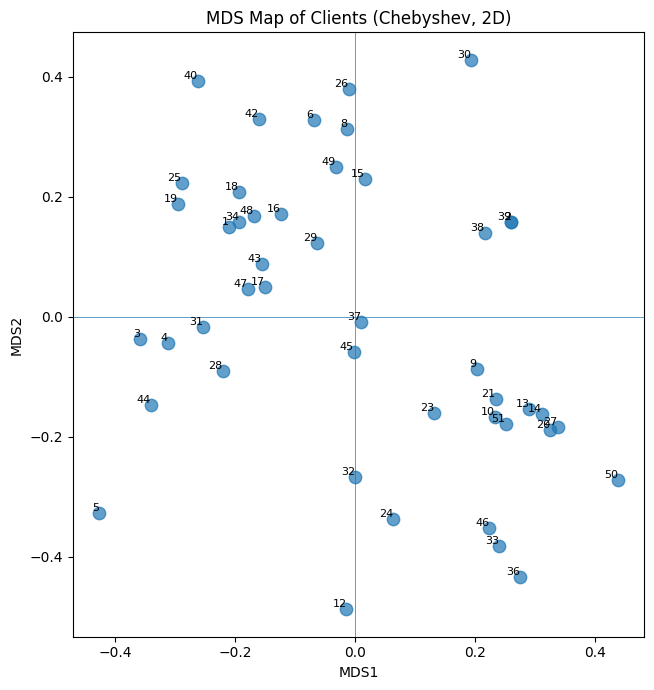

In [324]:
plt.figure(figsize=(7,7))
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7, s=80)
for i, (x, y) in enumerate(X_mds):
    plt.text(x, y, str(clients_coords.index[i]), fontsize=8, ha="right", va="bottom")

plt.title(f"MDS Map of Clients (Chebyshev, 2D)")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.tight_layout()

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.gca().set_aspect('equal','box')

plt.show()

Сравнение с картой клиентов из PCA:
- Мы получили похожую карту клиентов, но повернутую приблизительно на 45 градусов по часовой стрелке, что и ожидалось, учитывая полученное ранее низкое значение нормированного стресса; таким образом, метод MDS позволил нам найти двумерное евклидово представление клиентов, при котором взаимные расстояния (в нашем случае -- по метрике Чебышева) максимально сохраняются; на новом графике можно наблюдать те же условные кластеры, которые мы наблюдали на PCA карте.

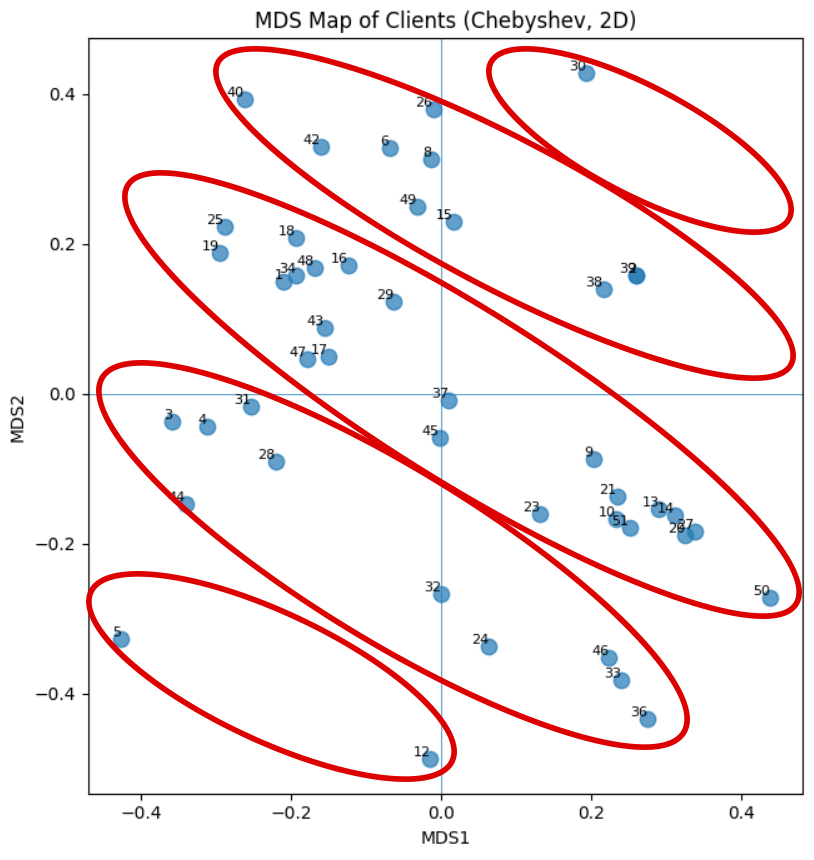